<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import random 

mpl.rcParams['figure.figsize'] = (14,7)

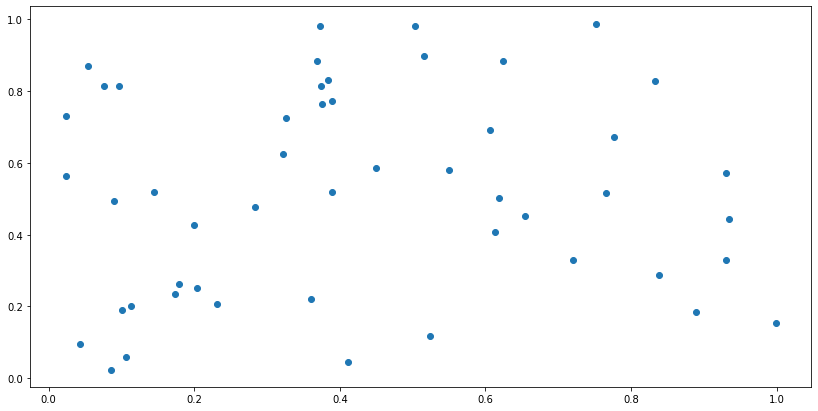

In [184]:
puntos = np.random.rand(50,2)        
# puntos
plt.scatter(puntos[:,0], puntos[:,1])

In [185]:
### Create Voronoi object
vor = Voronoi(puntos)
print(puntos.shape)

(50, 2)


In [186]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)
# vor_vertices[:,0]

(87, 2)


In [187]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[], [8, -1, 7], [11, 9, 10], [11, 2, -1, 9], [15, 10, 9, -1, 14], [18, 4, 5, 16], [18, 4, 3, 0, -1, 17], [20, 17, -1, 6, 19], [23, 16, 18, 17, 20], [31, 12, 2, -1, 30], [45, 40, 41, 42, 43, 44], [41, 22, 21, 19, 20, 23, 40], [45, 5, 16, 23, 40], [42, 26, 22, 41], [43, 24, 25, 27, 26, 42], [44, 3, 0, 1, 24, 43], [45, 5, 4, 3, 44], [49, 46, 37, 38, 25, 24, 1, 47], [48, 7, -1, 0, 1, 47], [52, 48, 7, 8, 51], [53, -1, 8, 51], [54, 29, 14, -1, 53], [59, 57, 56, 58], [58, 27, 26, 22, 21, 34, 56], [65, 62, 61, 60, 63, 64], [63, -1, 6, 60], [61, 34, 21, 19, 6, 60], [62, 36, 35, 57, 56, 34, 61], [65, 32, 13, 33, 36, 62], [64, 30, -1, 63], [65, 32, 31, 30, 64], [67, 46, 37, 39, 28, 66], [68, 50, 49, 46, 67], [73, 71, 69, 70, 72], [70, 52, 48, 47, 49, 50, 69], [71, 68, 50, 69], [72, 54, 53, 51, 52, 70], [73, 66, 67, 68, 71], [73, 66, 28, 29, 54, 72], [80, 77, 76, 75, 78, 79], [76, 55, 35, 36, 33, 75], [78, 13, 33, 75], [77, 74, 55, 76], [79, 12, 31, 32, 13, 78], [86, 83, 82, 81, 84, 85], [84, 38,

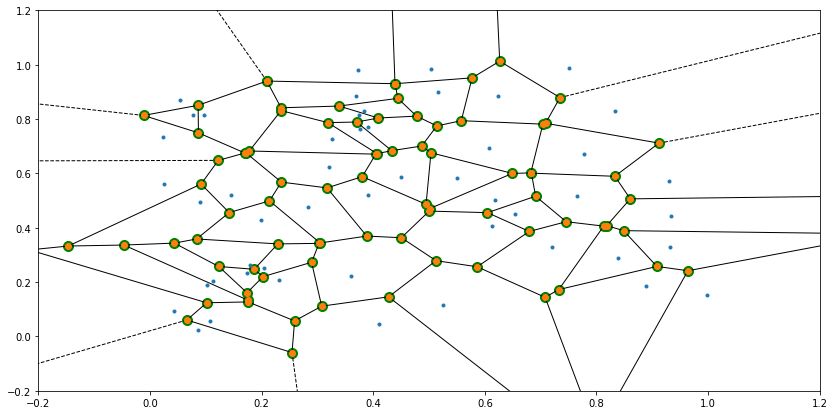

In [188]:
### Use built-in function to plot 
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
# voronoi_plot_2d(Voronoi(vor_vertices))
plt.show()

Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

\begin{align}
    \alpha(r, \theta) = r\theta,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

In [200]:
### parámetros
theta = np.linspace(0, np.pi, 500);
r = np.array([1.0, 2.0]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

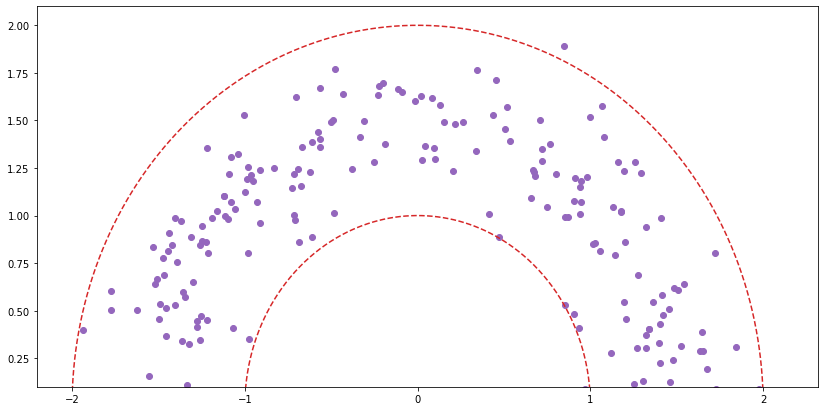

In [209]:
N = 200;
mu, sigma = 0.5, 0.2

X, Y = [], []
# np.empty(len(theta)), np.empty(len(theta))
for i in range(len(r)):
    X.append(alpha_x(r[i], theta))
    Y.append(alpha_y(r[i], theta))

X = np.array(X).flatten()
Y = np.array(Y).flatten()
pts = np.array([X, Y]).T

r_rand     = np.random.normal(mu, sigma, N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X, Y, "--", color="tab:red")
plt.ylim([0.1,2.1])
plt.show()

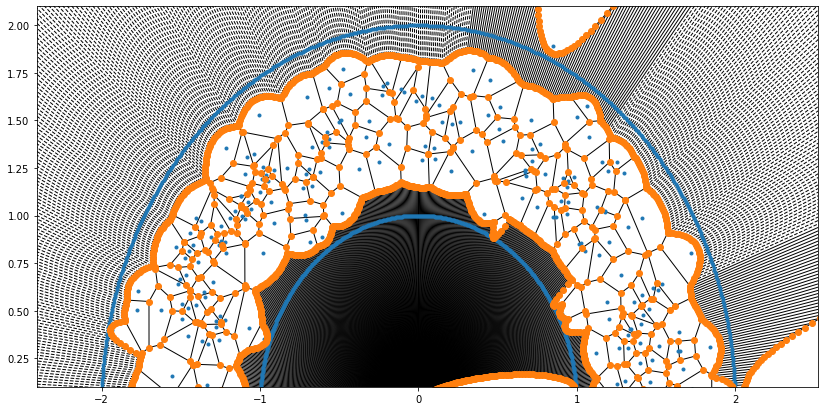

<Figure size 1080x504 with 0 Axes>

In [210]:
total = np.concatenate((pts, pts_rand))
vor = Voronoi(total)


voronoi_plot_2d(vor)
plt.ylim([0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

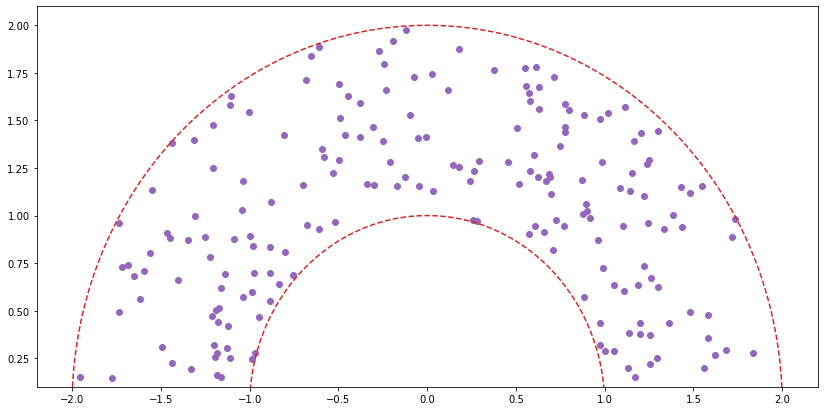

In [211]:
N = 200;
# mu, sigma = 0.5, 0.2

X, Y = [], []
# np.empty(len(theta)), np.empty(len(theta))
for i in range(len(r)):
    X.append(alpha_x(r[i], theta))
    Y.append(alpha_y(r[i], theta))

X = np.array(X).flatten()
Y = np.array(Y).flatten()
pts = np.array([X, Y]).T

r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X, Y, "--", color="tab:red")
plt.ylim([0.1,2.1])
plt.show()

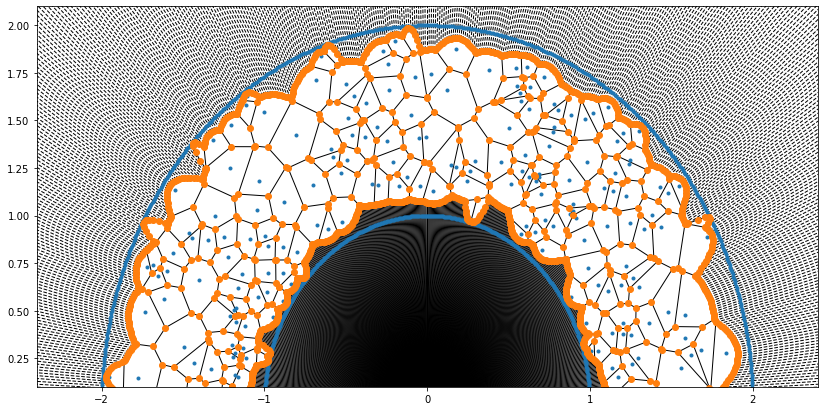

<Figure size 1080x504 with 0 Axes>

In [212]:
total = np.concatenate((pts, pts_rand))
vor = Voronoi(total)


voronoi_plot_2d(vor)
plt.ylim([0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()